# Live tutorial 2018-09-13

In [1]:
import geopandas as gpd
%matplotlib inline

/home/havahol/miniconda3/envs/geohack2/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/havahol/miniconda3/envs/geohack2/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
!ls ../data

breweries.csv  cb_2016_us_state_5m.zip	DC_shp	DC_shp.zip  nps  nps.zip


Read national parks

In [3]:
parks = gpd.read_file('../data/nps')

In [4]:
parks.head()

,DATE_EDIT,GIS_LOC_ID,GIS_NOTES,GROUP_CODE,LANDS_CODE,META_MIDF,UNIT_CODE,UNIT_NAME,UNIT_TYPE,id,observed,geometry
0,2006/03/09,None,POC for this update: richard_menicke@nps.gov ...,None,None,None,GLAC,Glacier,National Park,1604373,None,"POLYGON ((-114.4755159847537 49.0009136904987,..."
1,None,None,Shifted 0.04 miles,None,None,None,CANY,Canyonlands,National Park,1604382,None,(POLYGON ((-109.8856200129457 38.4854254669334...
2,None,None,Shifted 0.06 miles,None,None,None,NOCA,North Cascades,National Park,1604517,None,(POLYGON ((-121.3776115871471 48.6357360079056...
3,2008/01/08,None,Lands,None,None,None,KOVA,Kobuk Valley,National Park,1604524,None,POLYGON ((-159.5027878412329 67.80979011213896...
4,2008/01/08,None,Lands,None,None,None,LACL,Lake Clark,National Park,1604526,None,(POLYGON ((-152.8508309821284 60.2380394475578...


In [5]:
olympic = parks[parks.UNIT_NAME == 'Olympic']

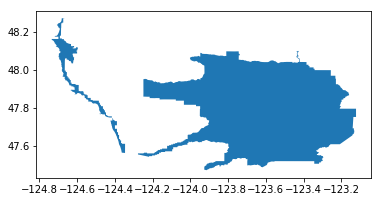

In [6]:
olympic.plot()

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf


/home/havahol/miniconda3/envs/geohack2/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[-124.73483637   47.46949568 -123.1216665    48.27472128]


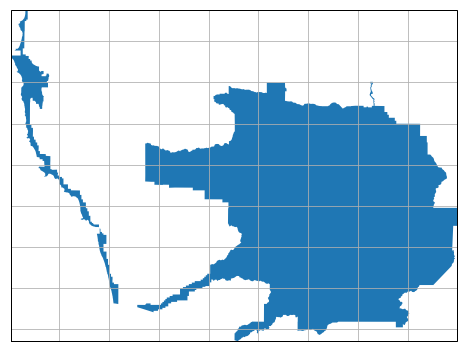

In [12]:

bounds = olympic.total_bounds
print (bounds)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection = ccrs.Mercator())

ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])
ax.gridlines()
ax.add_geometries(olympic.geometry, crs = ccrs.PlateCarree())


Adding coastlines

[-124.73483637   47.46949568 -123.1216665    48.27472128]


/home/havahol/miniconda3/envs/geohack2/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


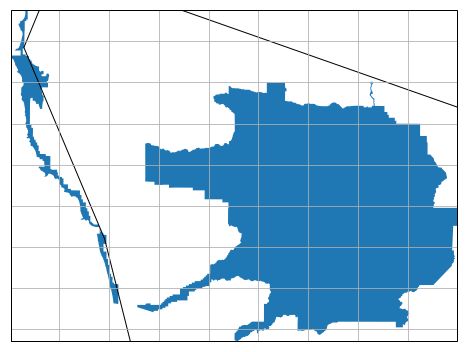

In [14]:

bounds = olympic.total_bounds
print (bounds)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection = ccrs.Mercator())

ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])
ax.gridlines()
ax.add_geometries(olympic.geometry, crs = ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE)


[-124.73483637   47.46949568 -123.1216665    48.27472128]


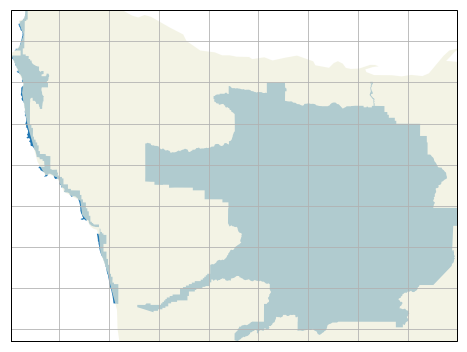

In [17]:
land = cf.NaturalEarthFeature(category='physical',
                              name='land',
                              scale='10m',
                              facecolor=cf.COLORS['land'],
                              alpha=0.7)

bounds = olympic.total_bounds
print (bounds)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection = ccrs.Mercator())

ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])
ax.gridlines()
ax.add_geometries(olympic.geometry, crs = ccrs.PlateCarree())
ax.add_feature(land)

[-124.73483637   47.46949568 -123.1216665    48.27472128]


Text(449087,5.29429e+06,'Mt. Olympus')

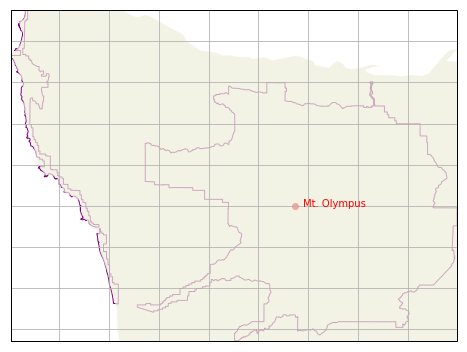

In [26]:

land = cf.NaturalEarthFeature(category='physical',
                              name='land',
                              scale='10m',
                              facecolor=cf.COLORS['land'],
                              alpha=0.7)

bounds = olympic.total_bounds
print (bounds)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection = ccrs.Mercator())

ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])
ax.gridlines()
ax.add_geometries(olympic.geometry, crs = ccrs.PlateCarree(),  facecolor='none', edgecolor='purple')
ax.add_feature(land)
# Adding the position of Mt. Olympus
ax.scatter(447087.3, 5294290.9, transform = ccrs.UTM(10), color='red')
ax.text(447087.3 + 2000, 5294290.9, "Mt. Olympus", transform = ccrs.UTM(10), color='red')

